In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import pandas as pd
import os
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import itertools
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score,confusion_matrix
import pathlib

In [4]:
data_dir = '/kaggle/input/blood-cells-image-dataset/bloodcells_dataset'
data_dir = pathlib.Path(data_dir).with_suffix('')

In [20]:


train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset='training',
    seed = 123,
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 17092 files belonging to 8 classes.
Using 13674 files for training.


In [7]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset='validation',
    seed = 123,
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 17092 files belonging to 8 classes.
Using 5127 files for validation.


In [21]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [22]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(8,activation='softmax'))



In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
428/428 [==============================] - 36s 77ms/step - loss: 1.0157 - accuracy: 0.6218 - val_loss: 0.6246 - val_accuracy: 0.7693
Epoch 2/5
428/428 [==============================] - 35s 80ms/step - loss: 0.4627 - accuracy: 0.8333 - val_loss: 0.3551 - val_accuracy: 0.8699
Epoch 3/5
428/428 [==============================] - 35s 80ms/step - loss: 0.3151 - accuracy: 0.8855 - val_loss: 0.3882 - val_accuracy: 0.8631
Epoch 4/5
428/428 [==============================] - 35s 81ms/step - loss: 0.2340 - accuracy: 0.9179 - val_loss: 0.2592 - val_accuracy: 0.9128
Epoch 5/5
428/428 [==============================] - 34s 79ms/step - loss: 0.1598 - accuracy: 0.9438 - val_loss: 0.2599 - val_accuracy: 0.9083


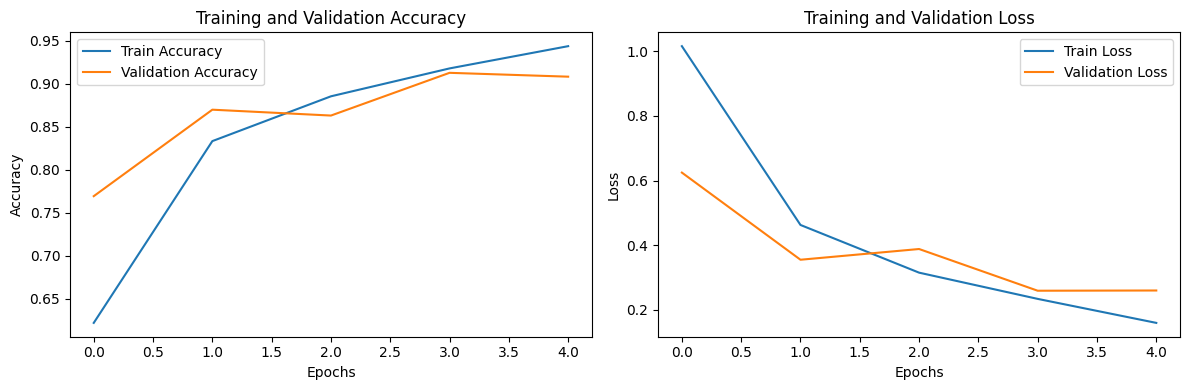

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()